# Implement K-Nearest Neighbour algorithm to classify the iris Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Iris.csv")

In [33]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.values[0:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [6]:
df.drop(columns="Id",inplace=True)

In [8]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [14]:
X=df.iloc[:,:4]
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [18]:
y=df.iloc[:,-1]
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

In [23]:
#Normalization 
X= preprocessing.StandardScaler().fit_transform(X)
X[0:2]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673]])

In [24]:
#Train test split
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [25]:
#Model fitting

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [27]:
#Accuracy 

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9777777777777777

In [29]:
#Confusion matrix

matrix= confusion_matrix(y_test.values,y_predict)
matrix

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

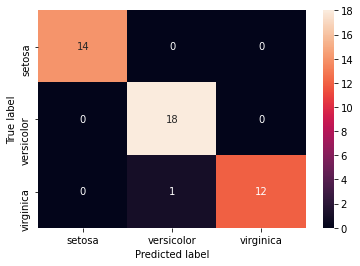

In [37]:
sns.heatmap(matrix, annot=True, xticklabels = ["setosa", "versicolor","virginica"] , yticklabels = ["setosa", "versicolor","virginica"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [32]:
output=pd.DataFrame(data=[y_test.values,y_predict],index=["y_test","y_predict"])
output.T[0:5]

,y_test,y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
